In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Bhopal.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Sagar Gaire Fast Food,300,"North Indian,South Indian,Chinese,Fast Food,Be...",Bhopal,TT Nagar,Quick Bites,9am to 11pm(Mon-Sun),Excellent,4.5,1401
1,Zam Zam Fast Food,500,"North Indian,Mughlai",Bhopal,Peer Gate Area,Casual Dining,11am to 12midnight(Mon-Sun),Very Good,4.1,869
2,Manohar Dairy And Restaurant,400,"Street Food,South Indian,Fast Food,Desserts,No...",Bhopal,Peer Gate Area,Quick Bites,9am to 11pm(Mon-Sun),Very Good,4.4,756
3,Vishnu Chinese Fast Food,350,"North Indian,South Indian,Chinese,Fast Food",Bhopal,Maharana Pratap Nagar,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.3,798
4,Khan Sahab,600,"North Indian,Mughlai",Bhopal,Peer Gate Area,Casual Dining,11am to 12midnight(Mon-Sun),Very Good,4.2,739


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 10 columns):
Name                905 non-null object
Price               905 non-null int64
Cuisine_Category    905 non-null object
City                905 non-null object
Region              905 non-null object
Cuisine_Type        905 non-null object
Timing              902 non-null object
Rating_Types        905 non-null object
Rating              905 non-null float64
Votes               905 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 70.8+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,905.000000,905.000000,905.000000
mean,385.558011,3.465414,70.222099
std,203.854297,0.405749,123.215099
min,0.000000,2.100000,4.000000
25%,250.000000,3.200000,12.000000
50%,300.000000,3.500000,28.000000
75%,500.000000,3.700000,70.000000
max,1500.000000,4.900000,1401.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              3
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Tea Holic                 2
The Belgian Waffle Co.    2
Food Adda                 2
Silbatta Chicken          2
Tea Friend's              2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Maharana Pratap Nagar    167
BHEL                     118
TT Nagar                  82
Gulmohar Colony           82
Arera Colony              80
Peer Gate Area            66
Kohefiza                  60
Hoshangabad Road          54
Jhangirabad               50
Airport Area              35
Name: Region, dtype: int64

Text(0.5,1,'Region')

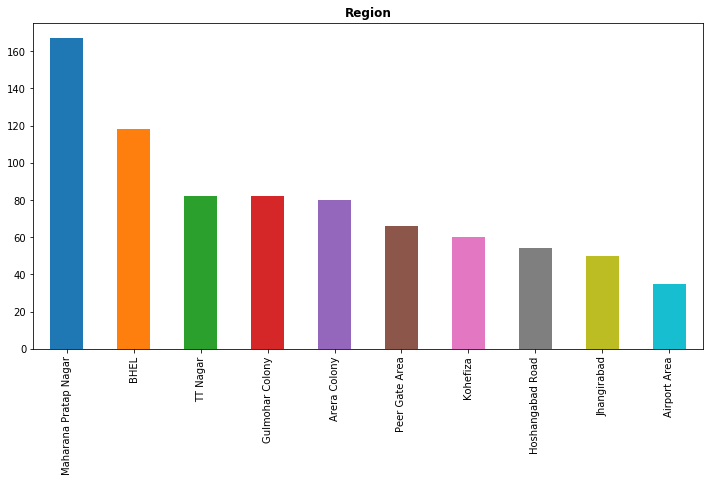

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

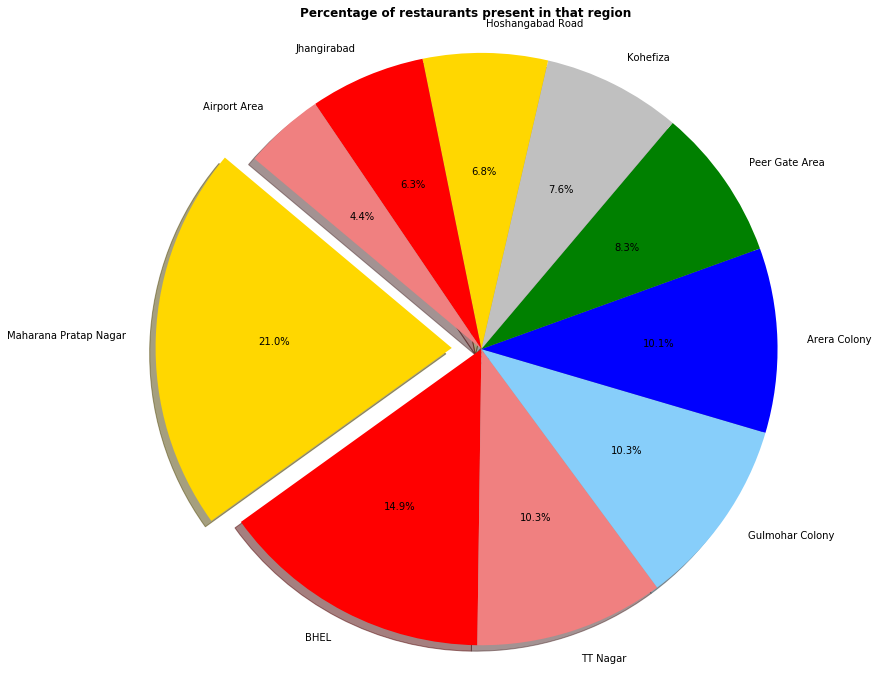

In [12]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [13]:
data['Rating_Types'].value_counts().head(10)

Average      437
Good         357
Very Good     96
Excellent     10
Poor           5
Name: Rating_Types, dtype: int64

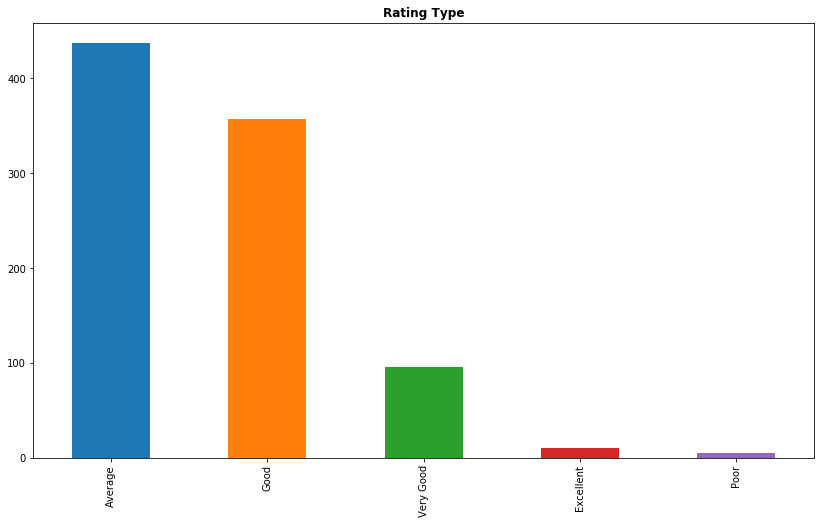

In [14]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [15]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       485
Casual Dining     188
none               40
Bakery             39
Café               38
Sweet Shop         21
Dessert Parlor     20
Bhojanalya         18
Beverage Shop      18
Dhaba               9
Name: Cuisine_Type, dtype: int64

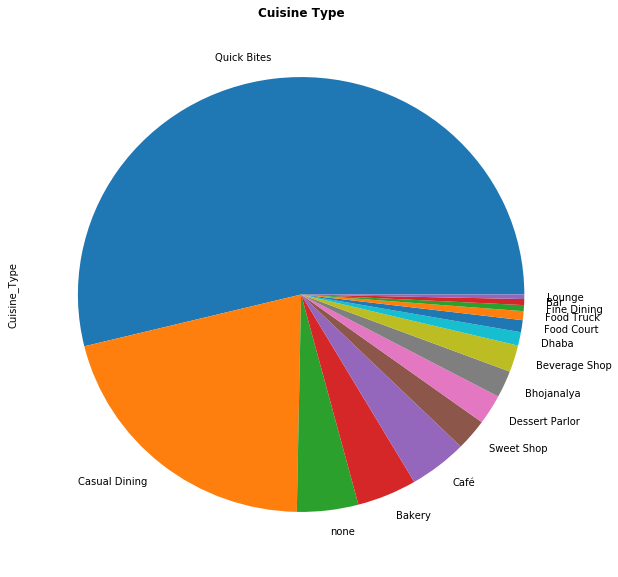

In [16]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [17]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [18]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [19]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4662971175166275


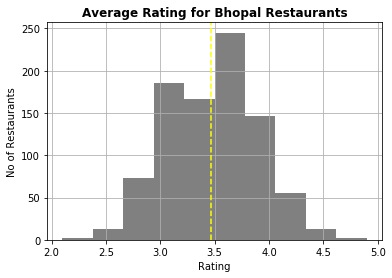

In [20]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bhopal Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Bhopal is found to be around 3.4

# Top cuisines in Bhopal 

In [23]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

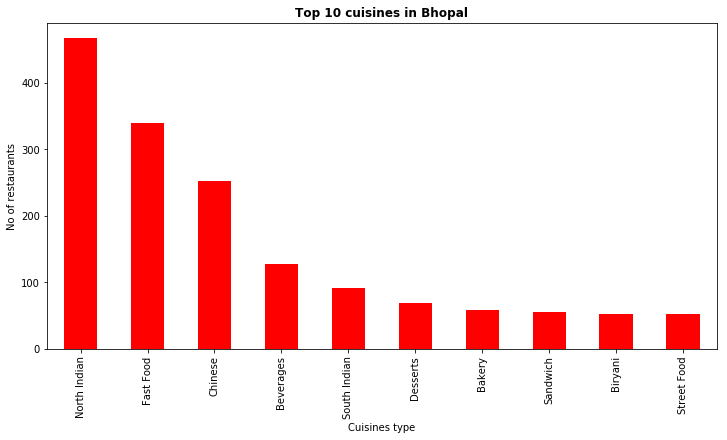

In [24]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bhopal',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [25]:
data['Price'].value_counts()[:20]

300     194
400     128
200     125
250     101
500      97
350      47
600      40
800      34
150      33
700      24
450      18
550      14
100      12
1000      9
1200      8
650       7
1500      4
750       3
900       2
180       1
Name: Price, dtype: int64

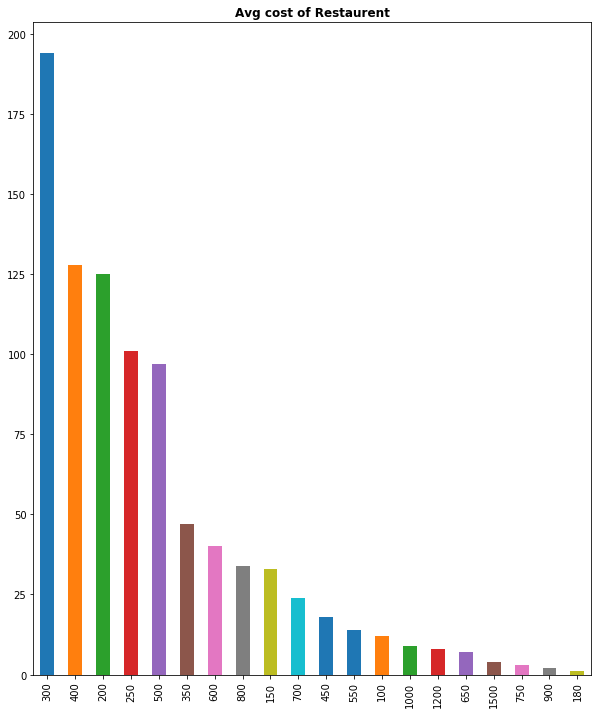

In [26]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [27]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

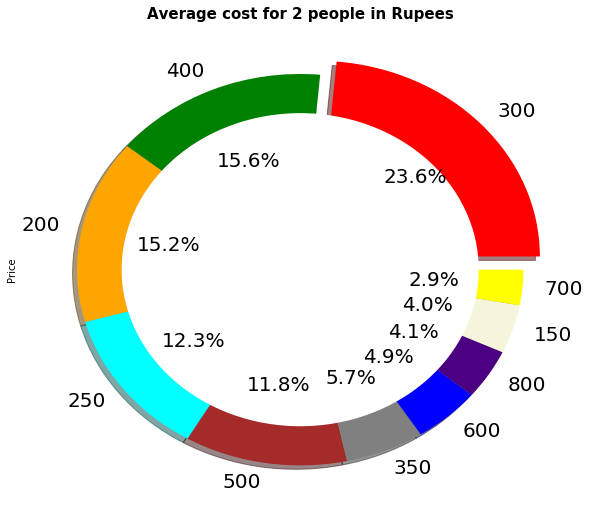

In [28]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300